# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`** и html-версии графиков (подробности в условии).
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [82]:
# Bot check

# HW_ID: fpmi_ad2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="https://www.yelp.com/">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>, но использовать нужно выданные данные.

_____________

**Что нужно сделать:**

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.


*Далее в условии встречаются различные подсказки, как можно выполнить определенные части задачи. Вы можете их игнорировать и делать иным способом для получения **того же самого промежуточного результата**. Однако, если ваше решение окажется **значительно** менее эффективным (по скорости, количеству и красоте кода) по сравнению с предполагаемым, баллы могут быть снижены.*

------

#### 1. Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [59]:
data = pd.read_csv('yelp_business.csv', index_col=0)
data.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [60]:
data.groupby(['city']).sum().sort_values(by=['is_open'], ascending=False).drop(columns=['latitude', 'longitude']).head()

<ipython-input-60-ef83fc26d76b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,is_open
city,
Las Vegas,22120
Phoenix,14487
Toronto,13555
Charlotte,7269
Scottsdale,6738


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

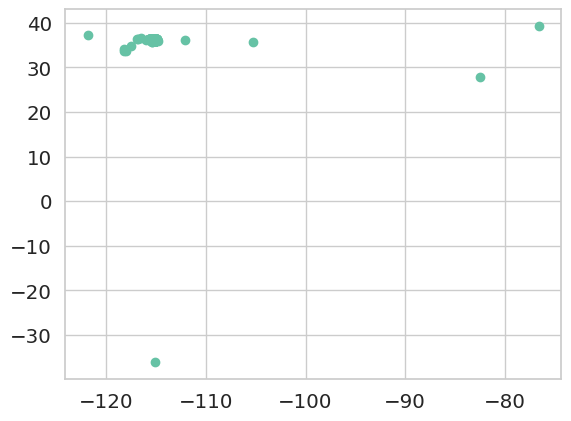

In [61]:
data = data[data.city == 'Las Vegas']
plt.figure()
plt.scatter(data.longitude, data.latitude)
plt.show()


Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы.

Будем считать границами города долготу от -115.3 до -115.05 и широту от 36.025 до 36.275

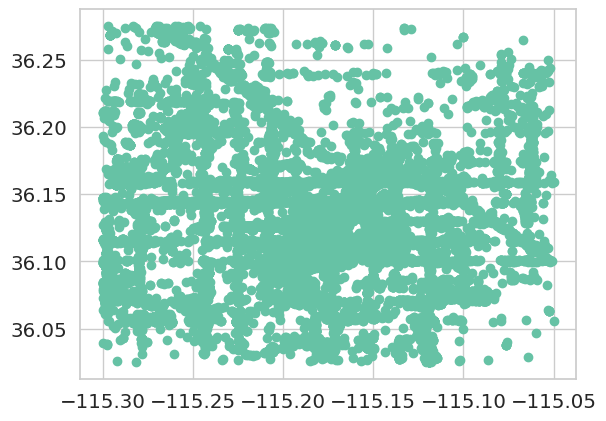

In [62]:
data = data[(36.025 < data.latitude) & (data.latitude < 36.275) & (-115.05 > data.longitude) & (data.longitude > -115.3)]
plt.figure()
plt.scatter(data.longitude, data.latitude)
plt.show()

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб, и его не получится отправить боту. В любом случае **<u>необходимо сохранить карту в html и отправить ее отдельным файлом в бот.</u>** При этом каждый файл html должен не превышать 20 Мб, присылать файлы в архиве нельзя. Аналогично со всеми следующими интерактивными графиками в этом задании.

In [63]:
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [64]:
fig = go.Figure(go.Scattermapbox(lat=data.latitude, lon=data.longitude))

map_center = go.layout.mapbox.Center(lat=(data.latitude.max()+data.latitude.min())/2,
                                     lon=(data.longitude.max()+data.longitude.min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=10))
fig.show()

In [65]:
fig.write_html("1.html")

Если все получилось, вы молодцы! Далее в этой задаче тоже стройте интерактивные карты. Если нет желания разбираться с интерактивными графиками, можно построить статичные, но баллы будут снижены.

#### 2. Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [66]:
data_review = pd.read_csv('yelp_review.csv', index_col=1)
data_review = data_review.drop('Unnamed: 0', axis=1)
data_review.head()

,stars
business_id,
AEx2SYEUJmTxVVB18LlCwA,5
VR6GpWIda3SfvPC-lg9H3w,5
CKC0-MOWMqoeWf6s-szl8g,5
ACFtxLv8pGrrxMm6EgjreA,4
s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`.

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [67]:
data_review = data_review.loc[data.business_id]
data_review

,stars
business_id,
kCoE3jvEtg6UVz5SOD3GVw,4
kCoE3jvEtg6UVz5SOD3GVw,1
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
kCoE3jvEtg6UVz5SOD3GVw,5
...,...
9ouC6BpmjFpLfHeQnLQqng,5
9ouC6BpmjFpLfHeQnLQqng,5
9ouC6BpmjFpLfHeQnLQqng,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок.

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [68]:
data_review = data_review.groupby(['business_id']).aggregate([np.mean, np.size])
data_review

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19
...                          ...   ...
zzOo9n22fBbKAhbSpMzggA  3.230769    26
zzXuJF6UUT1kgTyCsmgDmQ  5.000000     4
zzjqFOujmM9surbMANZ_ag  5.000000     3
zzsKbL1KMNJqazSqBXskxQ  3.666667     6
zzzaIBwimxVej4tY6qFOUQ  3.432432    37

[23061 rows x 2 columns]

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [69]:
data_review.columns = data_review.columns.droplevel()
data_review = data_review.rename(columns={'mean':'оценка', 'size':'отзывов'})
data_review

,оценка,отзывов
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19
...,...,...
zzOo9n22fBbKAhbSpMzggA,3.230769,26
zzXuJF6UUT1kgTyCsmgDmQ,5.000000,4
zzjqFOujmM9surbMANZ_ag,5.000000,3


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, а также две колонки со средней оценкой компаний и количеством оценок, которые вы посчитали выше.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [70]:
data = data.set_index('business_id')
data = data.join(data_review)
data.head()

,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,оценка,отзывов
business_id,,,,,,,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,1,Real Estate Services;Real Estate;Home Services...,4.000000,5
OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1,Shopping;Sporting Goods,1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,1,Shopping;Jewelry;Watch Repair;Local Services,4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,1,Home Services;Lighting Fixtures & Equipment;Lo...,4.450000,20
DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",NaN,"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,1,Nurseries & Gardening;Home & Garden;Shopping,3.680000,25


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$. Если у одной компании несколько филиалов с разными адресами, наносите на график все адреса.

In [71]:
fig = go.Figure(go.Scattermapbox(lat=data.latitude, lon=data.longitude, text = data.name, marker=dict(colorbar=dict(title="оценка"),
                                                                                                      color=data['оценка'])))

map_center = go.layout.mapbox.Center(lat=(data.latitude.max()+data.latitude.min())/2,
                                     lon=(data.longitude.max()+data.longitude.min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=10))
fig.show()

In [72]:
fig.write_html("2.html")

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района.

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [73]:
data['longitude_district'] = np.round(data.longitude*4, decimals=1)*0.25
data['latitude_district'] = np.round(data.latitude*4, decimals=1)*0.25
fig = go.Figure(go.Scattermapbox(lat=data['latitude_district'], lon=data['longitude_district']))

map_center = go.layout.mapbox.Center(lat=(data.latitude.max()+data.latitude.min())/2,
                                     lon=(data.longitude.max()+data.longitude.min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=10))
fig.show()

In [74]:
fig.write_html("3.html")

Для получения средней оценки компаний по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

*Замечание.* В качестве среднего можно было бы посчитать как общее среднее по всем оценкам всех компаний, так и среднее по компаниям их средних оценок. В чем разница этих подходов? Какой из них необходимо использовать в данном случае?

**Вывод:** Если в качестве среднего взять среднее от средних оценок компаний, то получается, что в рассмотрение попадает именно рейтинг заведения вне зависимости от количества отзывов (например если одно заведение имеет 1000 отзывов с рейтингом 5, а другое 1 отзыв с рейтингом 5, то они при таком подходе имеют одинаковую оценку), но это не очень хорошо, так как это далеко не равноценные рейтинги. Если в качестве среднего взять среднее всех отзывов, то получится, что в рассмотрении будут учавствовать только компании с большим числом отзывов, а компании с маленьким числом отзывов затеряются на их фоне. В нашем случае лучше подойдет среднее средних так как нам нужно учесть во внимание все бизнесы, а не только те, что обладают большем числом отзывов

<Axes: xlabel='longitude_district', ylabel='latitude_district'>

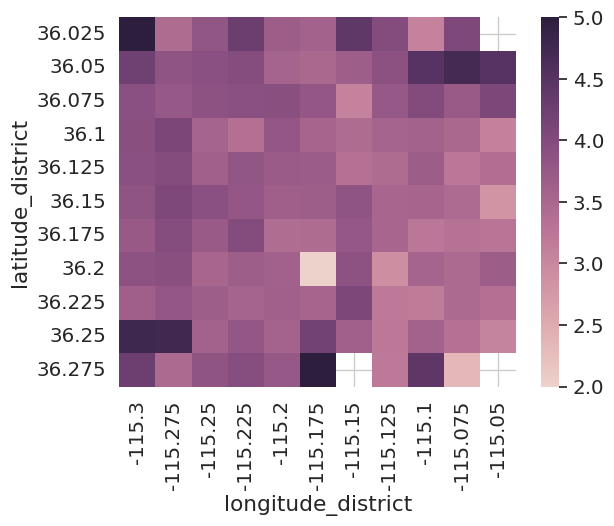

In [75]:
district_grade = pd.pivot_table(data, values='оценка', columns='longitude_district', index='latitude_district',
                      aggfunc='mean')
sns.heatmap(district_grade, cmap=sns.cubehelix_palette(as_cmap=True))

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Если в районе мало компаний, то может получиться так, что хороший результат не является объективным, а всего лишь хорошим для конкреьной небольшой выборки.

Нужно так же иметь ввиду, что если цветовая гамма начинается не с минимального значение (тоесть 1), то искажается восприятие разницы между оценками. Тоесть мы воспринимаем разницу между 2 и 5 так, как бы мы воспринимали разницу между 1 и 5

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

<Axes: xlabel='longitude_district', ylabel='latitude_district'>

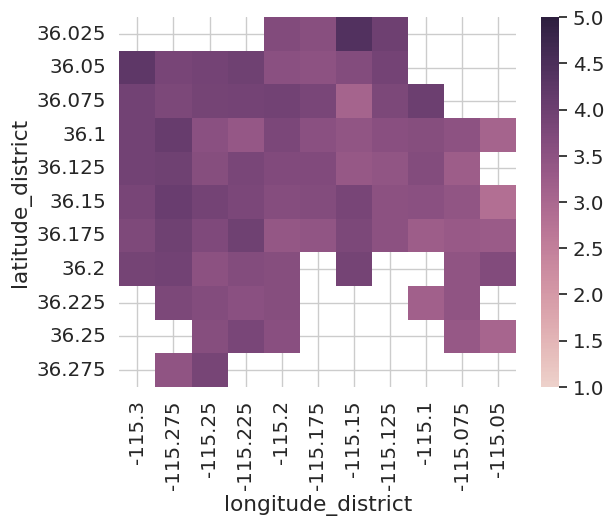

In [76]:
distr_grade30 = pd.pivot_table(data, values=['name', 'оценка'], columns='longitude_district', index='latitude_district',
                       aggfunc={'name': 'count', 'оценка': 'mean'})
sns.heatmap(distr_grade30[distr_grade30['name']>=30.0]['оценка'], cmap=sns.cubehelix_palette(as_cmap=True), vmin = 1.00, vmax = 5.00)

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Полученный график дает понять, какие районы хорошие, а какие нет с учетом того, что в каждом районе не очень маленькое число компаний. В том числе цветовая гамма не искажает соотношение между оценками

#### 3. Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [77]:
restaurant_data = data[(data['categories'].str.lower().str.contains('restaurants')) & (data['отзывов'] >= 5)]
restaurant_data.head()

,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories,оценка,отзывов,longitude_district,latitude_district
business_id,,,,,,,,,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,1,Nightlife;Bars;Barbeque;Sports Bars;American (...,3.769231,13,-115.175,36.075
4srfPk1s8nlm1YusyDUbjg,"""Subway""",Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.064652,-115.118954,1,Fast Food;Restaurants;Sandwiches,2.666667,6,-115.125,36.075
n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,1,Arcades;Arts & Entertainment;Gastropubs;Restau...,3.117479,349,-115.175,36.075
Wpt0sFHcPtV5MO9He7yMKQ,"""McDonald's""",Eastside,"""3020 E Desert Inn Rd""",Las Vegas,NV,89121,36.130013,-115.109310,1,Restaurants;Fast Food;Burgers,2.150000,20,-115.100,36.125
W1Yr6c2XDx_RBjb6WsV-aQ,"""Divine Cafe at the Springs Preserve""",Westside,"""333 S Valley View Blvd""",Las Vegas,NV,89152,36.170706,-115.190288,1,Restaurants;Cafes;American (New);Bars;Nightlif...,4.050000,140,-115.200,36.175


<Axes: xlabel='longitude_district', ylabel='latitude_district'>

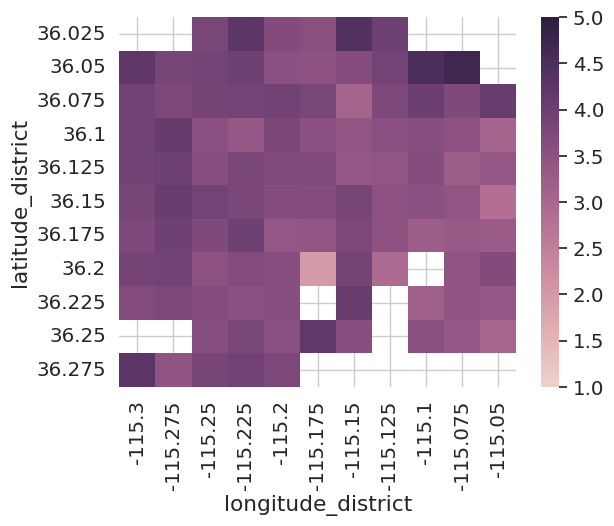

In [78]:
rest_grade10 = pd.pivot_table(data, values=['name', 'оценка'], columns='longitude_district', index='latitude_district',
                       aggfunc={'name': 'count', 'оценка': 'mean'})
sns.heatmap(distr_grade30[distr_grade30['name']>=10]['оценка'], cmap=sns.cubehelix_palette(as_cmap=True), vmin = 1.00, vmax = 5.00)

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Если много отзывов, то ресторан проверен временем и большим количеством клиентов, а значит точно хороший. Если в районе много хороших ресторанов, то в нем можно провести их более качественный выбор, что говорит о привлекательности района

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [79]:
best_restaurants = restaurant_data[restaurant_data['отзывов']>=50]
best_restaurants = best_restaurants.sort_values(by=['оценка'], ascending=False)[['name', 'оценка', 'отзывов', 'latitude', 'longitude', 'categories']]
best_restaurants.reset_index(drop=True, inplace=True)
best_restaurants.head(10)

,name,оценка,отзывов,latitude,longitude,categories
0,"""Lip Smacking Foodie Tours""",4.966480,179,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...
1,"""Pepito Shack""",4.907692,65,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
2,"""Bosa Boba Cafe""",4.890909,55,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
3,"""Garden Grill""",4.868132,91,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...
4,"""Brew Tea Bar""",4.848069,1165,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
5,"""Poppa Naps BBQ""",4.836538,104,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
6,"""Zenaida's Cafe""",4.833333,180,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes
7,"""El Frescos Cocina Mexicana""",4.816754,191,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...
8,"""Blaqcat Ultra Hookah Lounge""",4.809524,63,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...
9,"""Smooth Eats""",4.807018,57,36.167894,-115.140238,Juice Bars & Smoothies;Restaurants;Sandwiches;...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [80]:
restaurant_data = restaurant_data[(restaurant_data['оценка'] >= 4.7) & (restaurant_data['отзывов'] >= 50)]
fig = go.Figure(go.Scattermapbox(lat=restaurant_data.latitude, lon=restaurant_data.longitude, text=restaurant_data.name,
                                 marker=dict(color='green'), name='лучшие'))
fig2 = go.Figure(go.Scattermapbox(lat=best_restaurants[0:10].latitude, lon=best_restaurants[0:10].longitude, text=best_restaurants[0:10].name,
                                   marker=dict(color='red'), name='лучшие 10'))
map_center = go.layout.mapbox.Center(lat=(restaurant_data.latitude.min()+restaurant_data.latitude.max())/2,
                                     lon=(restaurant_data.longitude.min()+restaurant_data.longitude.max())/2)
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=10))
fig.add_trace(fig2.data[0])
fig.show()

In [81]:
fig.write_html("4.html")

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Кот Василий очень изберателен в своем выборе и хорошо разбирается в выборе ресторанов.

В данной задаче мы узнали много функций и методов из библиотек pandas,  Plotly. Это позволит нам в будущем более качественно подходить к анализу данных и визуализации данных